# Exercise 10-1: Create a linear regression

## Get the data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
fish = pd.read_csv('Fish.csv')

In [3]:
fish.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


## Clean the data

In [5]:
# read the info.txt file and rename the Length columns so they're more descriptive

new_column_names = {
    'Length1': 'Vertical_length_cm',
    'Length2': 'Diagonal_length_cm',
    'Length3': 'Cross_length_cm'
}

# Rename the columns in the fish DataFrame
fish.rename(columns=new_column_names, inplace=True)

# Display information about the DataFrame
fish

,Species,Weight,Vertical_length_cm,Diagonal_length_cm,Cross_length_cm,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


## Identify a correlation

In [6]:
#  Use the corr() method to view how other columns correlate with the Weight column.

fish.drop('Species', axis=1).corr()


,Weight,Vertical_length_cm,Diagonal_length_cm,Cross_length_cm,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Vertical_length_cm,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Diagonal_length_cm,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Cross_length_cm,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


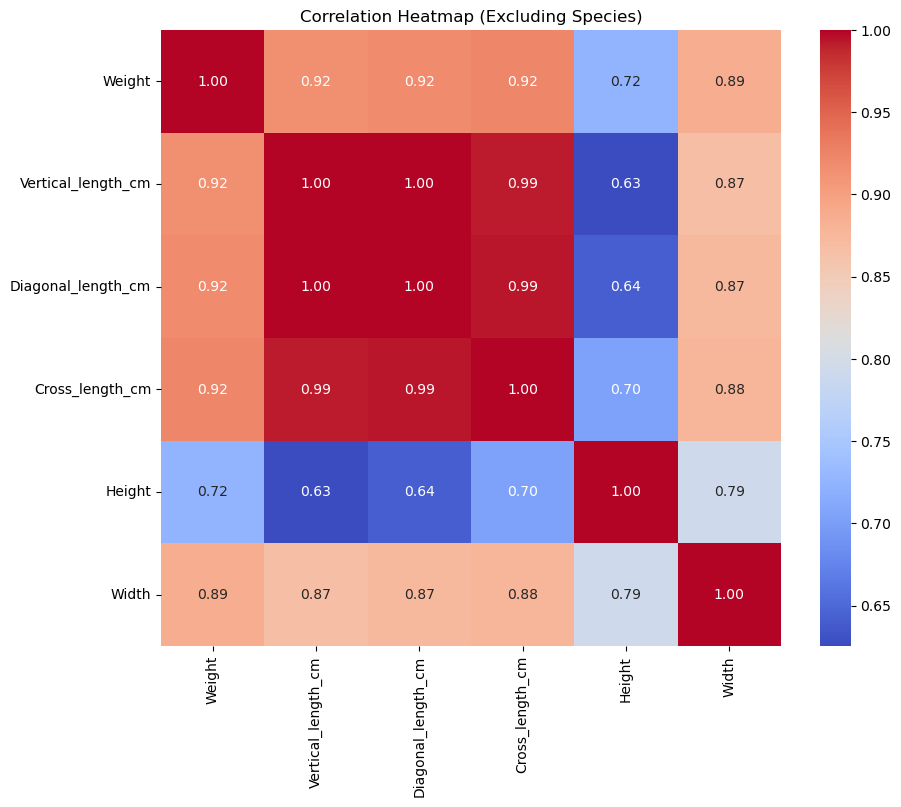

In [7]:
# create a heatmap for the correlation data
# Calculate the correlation matrix after dropping the 'Species' column
corr_matrix = fish.drop('Species', axis=1).corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Excluding Species)')
plt.show()

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


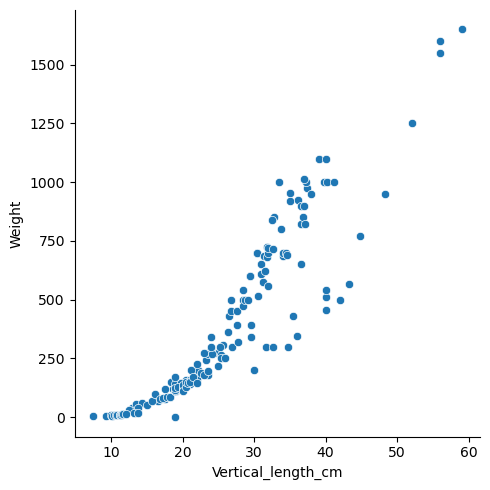

In [8]:
# use a scatterplot to plot the correlation between weight and vertical length for all fish
sns.relplot(data=fish, x='Vertical_length_cm', y='Weight')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


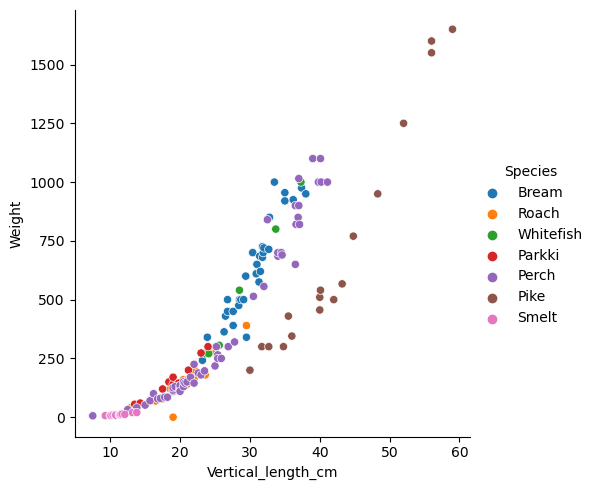

In [9]:
# create the same scatterplot as the previous cell, but use color to identify each species

sns.relplot(data=fish, x='Vertical_length_cm', y='Weight', hue='Species')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


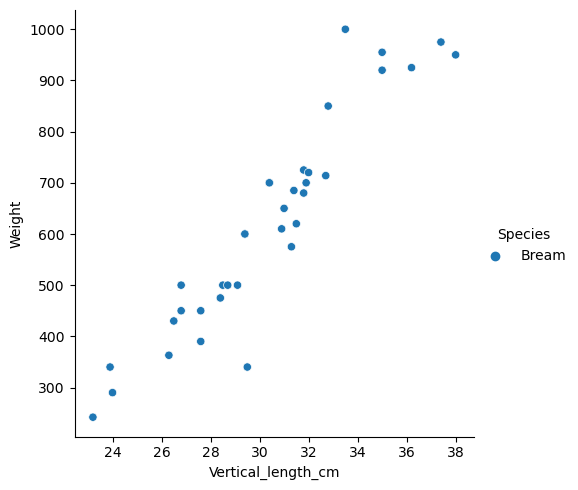

In [10]:
# create the same scatterplot as the previous cell, but only display data for the Bream species


sns.relplot(data=fish.query('Species == "Bream"'), 
            x='Vertical_length_cm', y='Weight', hue='Species')

## Create a linear model

In [11]:
# filter the data so it only contains the values for the Bream species 
# and assign the resulting DataFrame to a variable named bream
bream = fish.query('Species == "Bream"')

In [12]:
# split the training and testing data
x_train, x_test, y_train, y_test = train_test_split(
    bream[['Vertical_length_cm']], bream['Weight'])

In [13]:
# create the model and fit the training data
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [14]:
# score the testing data
model.score(x_test, y_test)

0.5905986915038758

In [15]:
# make the predictions
y_predicted = model.predict(x_test)
predicted = pd.DataFrame(y_predicted, columns = ['PredictedWeight'])

In [16]:
y_predicted

array([689.01113174, 700.0820933 , 722.22401641, 960.24968982,
       716.68853563, 528.48218921, 439.91449678, 534.01766999,
       589.37247776])

In [17]:
predicted


,PredictedWeight
0,689.011132
1,700.082093
2,722.224016
3,960.249690
4,716.688536
5,528.482189
6,439.914497
7,534.017670
8,589.372478


## Plot the regression line

In [18]:
# join the predicted data with the original data

final = predicted.join([x_test.reset_index(drop=True),
                        y_test.reset_index(drop=True)])
final.head()

,PredictedWeight,Vertical_length_cm,Weight
0,689.011132,31.3,575.0
1,700.082093,31.5,620.0
2,722.224016,31.9,700.0
3,960.249690,36.2,925.0
4,716.688536,31.8,680.0


In [19]:
# rename the Weight column to indicate that it stores actual values, not predicted values
final.rename(columns={'Weight':'ActualWeight'}, inplace=True)
final.head()

,PredictedWeight,Vertical_length_cm,ActualWeight
0,689.011132,31.3,575.0
1,700.082093,31.5,620.0
2,722.224016,31.9,700.0
3,960.249690,36.2,925.0
4,716.688536,31.8,680.0


In [20]:
# melt the actual and predicted data

finalMelt = pd.melt(final, id_vars=['Vertical_length_cm'], 
                    value_vars=['ActualWeight','PredictedWeight'], 
                    var_name='Variable', value_name='Value')
finalMelt.head()

,Vertical_length_cm,Variable,Value
0,31.3,ActualWeight,575.0
1,31.5,ActualWeight,620.0
2,31.9,ActualWeight,700.0
3,36.2,ActualWeight,925.0
4,31.8,ActualWeight,680.0


/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


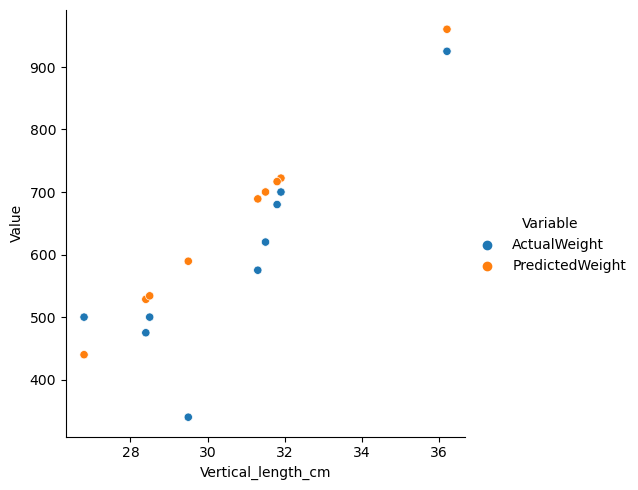

In [21]:
# use relplot() to plot the actual and predicted data

sns.relplot(data=finalMelt, x='Vertical_length_cm', y='Value', hue='Variable')

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


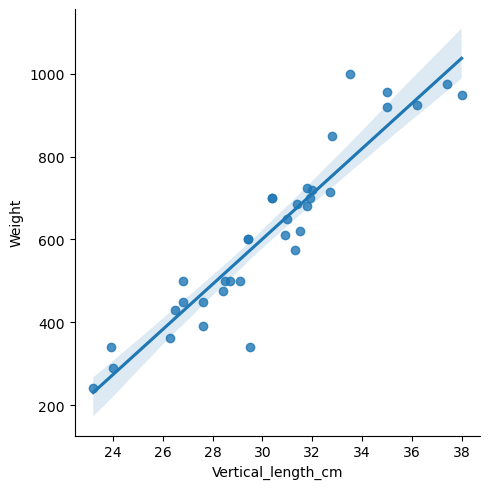

In [22]:
# use lmplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method

sns.lmplot(data=bream, x='Vertical_length_cm', y='Weight')

## Plot the residuals

In [23]:
# calculate the residuals and store them in a column

final['Residuals'] = final.ActualWeight - final.PredictedWeight

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


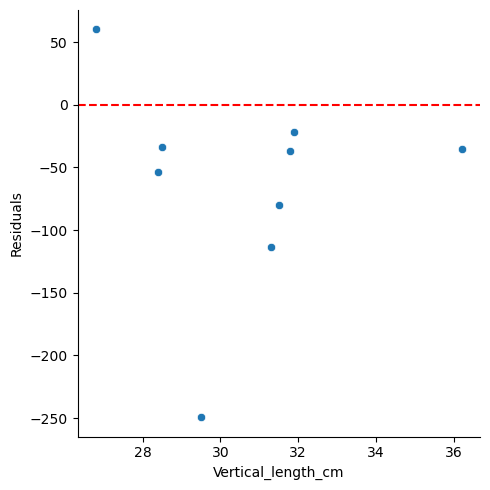

In [24]:
# use relplot() to create a scatterplot for the residuals

g = sns.relplot(data=final, x='Vertical_length_cm', y='Residuals')
for ax in g.axes.flat:
    ax.axhline(0, ls='--', color='red')

<Axes: xlabel='Vertical_length_cm', ylabel='Weight'>

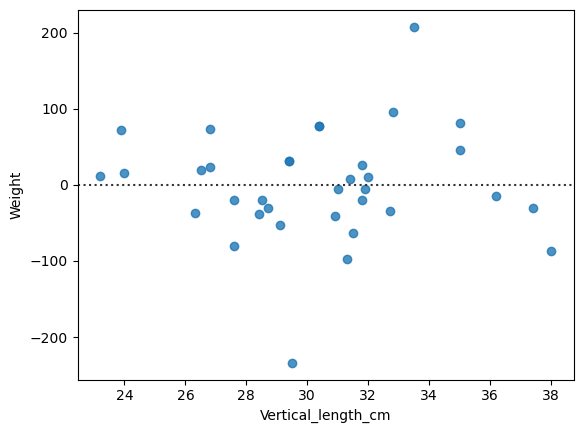

In [25]:
# use residplot() to produce a similar result
# NOTE: use the DataFrame named bream with this method

sns.residplot(data=bream, x='Vertical_length_cm', y='Weight')
